 # Conversion of the density response function from reciprocal to direct space
 
 Code to convert the $\chi^0_{\textbf{G},\textbf{G'}}(\textbf{q})$ of Abinit into a $\chi^0(\textbf{r},\textbf{r'})$ for a given $\omega$

 The code will take as an input a .SUS file and the q-point grid used to obtain the file. After the file is converted in a readable format, extraction of the $\chi^0_{\textbf{G},\textbf{G'}}(\textbf{q})$ matrices for every given $\textbf{q}$ will begin. The resulting matrix have the shape \[nw, ng, ng\] nw being the number of frequencies probed and ng the number of vectors $\textbf{G}$ used during the computation (see variable ecuteps).

 After collecting those matrix, the Fourier serie will be recomposed (for every $\omega$). The following formula will be used. $$\chi^0(\textbf{r},\textbf{r'},\omega)=\frac{1}{\Omega}\sum_{\textbf{q}}^{\text{BZ}}\sum_{\textbf{G},\textbf{G'}}\exp(i(\textbf{q}+\textbf{G})\cdot\textbf{r})\exp(-i(\textbf{q}+\textbf{G'})\cdot\textbf{r'})\chi^0_{\textbf{G},\textbf{G'}}(\textbf{q},\omega)$$
 

 This achieves the purpose of this code sections. The next steps, described hereunder, are to combine two of those function to get the $\chi^0(\textbf{r},\textbf{r'})$ function of a inhomogeneous system. Those functions could then be express in the reciprocal space if needed. Tools to manipulate, visualize and extract information out of the $\chi^0(\textbf{r},\textbf{r'})$ function will also be implemented.

# Full Algorithm 

## The $\chi^0(\boldsymbol{q},\boldsymbol{G},\boldsymbol{G'};\omega)$ construction algorithm
### Start
1. Extract the data from the SUS.nc file of Abinit ($\chi^0(\boldsymbol{q},\boldsymbol{G},\boldsymbol{G'};\omega)$,$ng$,$nq$,$n\omega$)
2. Check whether the q points sample the Full Brioullin Zone (FBZ) (see second part) or just the irreducible Brioullin Zone (IBZ)

### If only IBZ data 

3. Recover all the symmetries from the SUS.nc file (SymR,Symt,nsym)
4. Check whether the inversion symmetry is already part of the set, if not, add it
5. Construct all the q points of the FBZ
6. Construct all the $\boldsymbol{q}_{IBZ}+\boldsymbol{G}$ and $\boldsymbol{q}_{BZ}+\boldsymbol{G}$
7. Apply the symmetry to all the $\boldsymbol{q}_{IBZ}+\boldsymbol{G}$ and check whether $S(\boldsymbol{q}_{IBZ}+\boldsymbol{G})$ is in $\boldsymbol{q}_{BZ}+\boldsymbol{G}$ if not set all the values related to this vector to zero
8. Build $\chi^0(\boldsymbol{q},\boldsymbol{G},\boldsymbol{G};\omega)$ with the valid values (i.e. values for which the symmetries will be preserved)
9. Symmetrize the matrix with the relation : $$\chi^0_{\boldsymbol{G_1},\boldsymbol{G_2}}(\boldsymbol{q},\omega)=\chi^0_{-\boldsymbol{G_2},-\boldsymbol{G_1}}(-\boldsymbol{q},\omega)$$
10. Apply one of the FFT (full or Kaltak see next section)

### If FBZ data

3. Build the set of $\boldsymbol{q}_{BZ}+\boldsymbol{G}$
4. Check wheter the $-\boldsymbol{q}_{BZ}-\boldsymbol{G}$ is part of the set. If not, remove all the data linked to this vector
5. Build $\chi^0(\boldsymbol{q},\boldsymbol{G},\boldsymbol{G'};\omega)$ with the valid values (i.e. values for which the symmetries will be preserved)
6. Symmetrize the matrix with the relation $$\chi^0_{\boldsymbol{G_1},\boldsymbol{G_2}}(\boldsymbol{q},\omega)=\chi^0_{-\boldsymbol{G_2},-\boldsymbol{G_1}}(-\boldsymbol{q},\omega)$$
7. Apply one of the FFT (full or Kaltak see next section)


## FFT

Two approaches are proposed : a full FFT giving $\chi^0(\boldsymbol{r_s},\boldsymbol{r'_s},\omega)$ with both spatial coordinates in the supercell and one corresponding to the Algorithm proposed by Kaltak \textit{et al} [Kaltak,2014] leading to a function $\chi^0(\boldsymbol{r_p},\boldsymbol{r'_s},\omega)$ with one of the coordinates confined to the primitive cell while the second is in the supercell

### Full FFT Algorithm

The algorithm is composed of two steps : one for each vector.

1. $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'};\omega)$ is transformed into $\chi^0(\boldsymbol{r_s},\boldsymbol{q}+\boldsymbol{G};\omega)$ by performing an FFT for each $\boldsymbol{G'}$ :
$$\chi^0(\boldsymbol{r_s},\boldsymbol{q}+\boldsymbol{G'},\omega)=\frac{1}{\Omega}\sum_{\boldsymbol{q}}^{\text{BZ}}\sum_{\boldsymbol{G}}\exp(i(\boldsymbol{q}+\boldsymbol{G})\cdot\boldsymbol{r})\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'},\omega)$$

In practice, all the value corresponding to a given $\boldsymbol{G'}$ are stored in a 3D FFT box and then transformed and stored in an intermediate matrix of size $\chi^0(fftboxsize,nqng)$

2. The second coordinate is transformed : $\chi^0(\boldsymbol{r_s},\boldsymbol{q}+\boldsymbol{G};\omega)$ is transformed into $\chi^0(\boldsymbol{r_s},\boldsymbol{r'_s},\omega)$ by performing an FFT for each $\boldsymbol{r_s}$ vector : 
$$\chi^0(\boldsymbol{r_s},\boldsymbol{r_s'},\omega)=\frac{1}{\Omega}\sum_{\boldsymbol{q}}^{\text{BZ}}\sum_{\boldsymbol{G'}}\exp(-i(\boldsymbol{q}+\boldsymbol{G'})\cdot\boldsymbol{r'})\chi^0(\boldsymbol{r_s},\boldsymbol{q}+\boldsymbol{G'},\omega)$$

The final matrix is reshaped in order to obtain a 6D matrix with the first 3 coordinates corresponding to the first $\boldsymbol{r_s}$ and the last three to the second one.

### Kaltak Algorithm

The idea is to perform the 2 FFT in such a way that the periodicity helps shorten the computations
The first FFT will then transform the coordinate from the reciprocal space to direct space with a vector confined in the primitive unit cell while the second one will result in a direct space coordinate in the supercell : $\chi^0_{\boldsymbol{q}}(\boldsymbol{G},\boldsymbol{G'})$ becomes $\chi^0(\boldsymbol{r}_p,\boldsymbol{r'}_s)$ with $\boldsymbol{r}_p$ in the primitive unit cell and $\boldsymbol{r'}_s$ in the supercell.

The algorithm consists in two steps : 

- The first FFT is given by $$\chi^0_{\boldsymbol{q}}(\boldsymbol{r}_p,\boldsymbol{G'})=\sum_{\boldsymbol{G}}\exp(i\boldsymbol{G}\cdot\boldsymbol{r})\chi^0_{\boldsymbol{q}}(\boldsymbol{G},\boldsymbol{G'})$$ which gives $nqpt$ matrix of dimensions $ng$x$ng$.

- The second FFT is given by : $$\chi^0(\boldsymbol{r}_p,\boldsymbol{r'}_s)=\sum_{\boldsymbol{q+G'}}\exp(-i(\boldsymbol{q+G'})\cdot\boldsymbol{R})\chi^0(\boldsymbol{r}_p,\boldsymbol{q+G'})$$ leading to a 6d matrix with the three first coordinates corresponding to the $\boldsymbol{r}_p$ coordinates and the last three to the $\boldsymbol{r'}_s$ coordinates.

## How to reconstruct the data from the IBZ :

Data required : $\chi^0_{\boldsymbol{q}}(\boldsymbol{G},\boldsymbol{G})$ for $\boldsymbol{q}$ in the IBZ, table of the symmetry (S+t) in the reciprocal space.

1. Reconstruct the grid of the BZ :
    Start from the IBZ and apply the symmetries + store in dictionnary pair q=Sq so the symmetry operation is easily recover in the next step
2. Initialize the matrix $\chi^0_{\boldsymbol{q}}(\boldsymbol{G},\boldsymbol{G})$ for $\boldsymbol{q}$ in the BZ
    Use the size of the dictionnary of $\boldsymbol{q}$ used in (1) and multiply by G.
3. Complete the matrix by running over the q vectors. For the initial number, simply attribute the value of the matrix else, use $$\chi^0_{\boldsymbol{G_1},\boldsymbol{G_2}}(\boldsymbol{S}\boldsymbol{q}+\boldsymbol{G}_{\boldsymbol{S}})=\exp(i\boldsymbol{t}\cdot(\boldsymbol{G_2}-\boldsymbol{G_1}))\chi^0_{\boldsymbol{S}^{-1}(\boldsymbol{G_1}+\boldsymbol{G}_{\boldsymbol{S}}),\boldsymbol{S}^{-1}(\boldsymbol{G_2}+\boldsymbol{G}_{\boldsymbol{S}})}(\boldsymbol{q})$$ and, if time-reversal symmetry is appliable (i.e. if the unit cell does not present an inversion center): $$\chi^0_{\boldsymbol{G_1},\boldsymbol{G_2}}(\boldsymbol{q},\omega)=\chi^0_{-\boldsymbol{G_2},-\boldsymbol{G_1}}(-\boldsymbol{q},\omega)$$ The symmetry is recovered using the dictionnary generated above. 

4. You reached the same point as if you had computed all the values in the BZ.

In [1]:
import numpy as np
import math 
import cmath
import abipy
from abipy.electrons.scr import ScrFile
import time
import matplotlib.pyplot as plt

In [2]:
import pointcloud as pc
from scipy.interpolate import RegularGridInterpolator
import plotly.graph_objects as go

In [3]:
%load_ext autoreload
%autoreload 2
import Fourier_tool as Ft
import XGChi0 

# Construction of $\chi^0(\boldsymbol{q}+\boldsymbol{G}, \boldsymbol{q}+\boldsymbol{G'})$

In [17]:
chi0GG,vec_to_ind_to_pass, ind_to_vec_to_pass, n1, n2, n3, ind_q_to_vec, ind_G_to_vec = XGChi0.Build_Chi0GG("scro_DS1_SUS.nc","FullBZ")

# Basic Algo Xavier Bulk with symmetrization of $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$

In [18]:
chi0rr = XGChi0.FFT_chi0("scro_DS1_SUS.nc", "FullBZ")

In [19]:
print(chi0rr)

[[[[[[ 1.92175715e-11-3.20348719e-14j  8.04280427e-12+6.67327754e-12j
      -1.94161591e-12-3.73540487e-13j ...
       3.46546244e-12+2.33760362e-12j -1.95316784e-12+3.83059580e-13j
       8.05453093e-12-6.69946789e-12j]
     [ 6.75022694e-12+9.87422668e-12j -6.53573761e-12+4.89853982e-12j
      -2.71526911e-12-1.10299547e-12j ...
      -1.75545262e-12+4.56033795e-12j  4.43214728e-12+1.16611636e-13j
       1.54377561e-11+2.94450977e-12j]
     [-7.56847076e-12+3.53496306e-12j -7.97840094e-12-1.04783448e-12j
      -3.44981847e-12+4.55388439e-13j ...
       1.30861334e-12+1.35626280e-12j  9.85765342e-12+2.99900398e-12j
       4.90730958e-12+6.45796131e-12j]
     ...
     [-6.65471217e-12+9.35271892e-13j -3.74446595e-12-7.85096161e-13j
       4.57118794e-12-3.13016332e-12j ...
       4.73732184e-12+1.20256461e-12j -1.44460535e-12+6.53829044e-13j
      -4.81487112e-12-9.83106346e-14j]
     [-7.58145640e-12-3.52721494e-12j  4.88192570e-12-6.48594065e-12j
       9.83346742e-12-3.01800547e-12j

In [20]:
R=[6,10,3]
A = [1.6475190232561199, 0.0, 2.3299437469564794]
B = [-0.8237595116280599, 1.426793327357925, 2.3299437469564794]
C = [-0.8237595116280599, -1.426793327357925, 2.3299437469564794]
pos_red = np.array([[0, 0, 0]])
nat_cell = 1
nk = [4, 4, 4]

In [22]:
XGChi0.Vis_tool(chi0rr, R, A, B, C, nk, nat_cell, pos_red, N=10000, isomin=2e-13)

In [124]:
XGChi0.Vis_tool_Bulk(chi0rr, R, A, B, C, nk, N=10000, isomin=2e-9)

# Basic Algo Xavier Bulk with symmetries from complete file

In [37]:
chi0rrsym=XGChi0.FFT_chi0("scro_DS1_SUS.nc","FromSym")

In [55]:
print(chi0rrsym.shape)

(25, 25, 25, 25, 25, 25)


In [40]:
XGChi0.Vis_tool_Bulk(chi0rrsym, R, A, B, C, nk, N=10000, isomin=3e-9)

# Slab Computations

In [90]:
chi0rr2=Ft.Four6dp_opt("Al_Slab_GS_nsym1o_DS1_SUS.nc")

4775


In [128]:
nat_cellslab=4
Aslab=[2.017790474253013, -2.017790474253013, 0.0]
Bslab=[2.017790474253013, 2.017790474253013, 0.0]
Cslab=[0.0, 0.0, 14.124533319771093]
pos_redslab=np.array([[0.0000, 0.0000, -0.0060],
[-0.5000, 0.5000, 0.1369],
[0.0000, 0.0000, 0.2798],
[-0.5000, 0.5000, 0.4226]])
nkslab=[4,4,1]
Rslab=[10,9,17]

In [129]:
XGChi0.Vis_tool(chi0rr2, Rslab, Aslab, Bslab, Cslab, nkslab, nat_cellslab, pos_redslab, N=10000, isomin=2e-9)

# Slab with 2kpt in the z direction

In [61]:
chi0rr2kpt=Ft.Four6dp_opt("Al_Slab_GS_nsym1_2kpto_DS1_SUS.nc")

9743


# Slab from Sym (1kpt)

In [95]:
chi0rrnsym0=XGChi0.FFT_chi0("Al_Slab_GS_nsym0o_DS1_SUS.nc",opt="FromSym")

In [102]:
np.amax(np.abs(np.real(chi0rrnsym0)))

1.58963644517371e-06

In [130]:
XGChi0.Vis_tool(chi0rrnsym0, Rslab, Aslab, Bslab, Cslab, nkslab, nat_cellslab, pos_redslab, N=10000, isomin=2e-10)

# TEST ZONE

In [111]:
sus_ncfile1 = ScrFile("scro_DS1_SUS.nc")
kpoints1=sus_ncfile1.reader.kpoints
chi0t=sus_ncfile1.reader.read_wggmat(kpoints1[0])


In [109]:
##Open the file
sus_ncfile = ScrFile("Al_Slab_GS_nsym0o_DS1_SUS.nc")
##Get the list of kpoints
##Get the number of frequencies
nw=sus_ncfile.reader.nw
##Get the number of G-vectors
ng=sus_ncfile.reader.ng 
##Get the number of kpoints
##Get the chi0 matrix of q=0 0 0
kpoints=sus_ncfile.reader.kpoints
chi0=sus_ncfile.reader.read_wggmat(kpoints[0])
chi01=sus_ncfile.reader.read_wggmat(kpoints[1])
chi02=sus_ncfile.reader.read_wggmat(kpoints[3])
##Get the list of G vectors
G=chi01.gsphere.gvecs

kpoint_tab=kpoints.frac_coords
ind=kpoint_tab!=0
kpoints_tab=kpoint_tab[ind]
nkpt=len(kpoints)
""" nqg=nkpt*ng
Grid=qG_Grid(nqg,kpoints,nkpt,ng,G)
vectoind,indtovec=Dict_init(Grid,nqg)
nvec=len(vectoind)
chi0GG=chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,0)
chi0GGsym=chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG) """




' nqg=nkpt*ng\nGrid=qG_Grid(nqg,kpoints,nkpt,ng,G)\nvectoind,indtovec=Dict_init(Grid,nqg)\nnvec=len(vectoind)\nchi0GG=chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,0)\nchi0GGsym=chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG) '

In [78]:
structure=abipy.core.structure.Structure.from_file("scro_DS1_SUS.nc")
#print(structure)
Sym=abipy.core.symmetries.AbinitSpaceGroup.from_structure(structure)
SymRec=Sym.symrec
TRec=Sym.tnons
Tim_Rev=Sym.has_timerev
nsym=len(SymRec)
kpt=[[0,0,0],[0.25,0,0],[0.5,0,0],[0.25,0.25,0],[0.5,0.25,0],[-0.25,0.25,0],[0.5,0.5,0],[-0.25,0.5,0.25]]
#print(SymRec)
structure.lattice_vectors[]


<bound method Structure.lattice_vectors of Structure Summary
Lattice
    abc : 2.8535866547158504 2.8535866547158504 2.8535866547158504
 angles : 59.999999999999986 59.99999999999999 59.99999999999999
 volume : 16.430780655166938
      A : 1.6475190232561199 0.0 2.3299437469564794
      B : -0.8237595116280599 1.426793327357925 2.3299437469564794
      C : -0.8237595116280599 -1.426793327357925 2.3299437469564794
PeriodicSite: Al (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]>

In [139]:
structureSlab1=abipy.core.structure.Structure.from_file("Al_Slab_GS_nsym0o_DS1_SUS.nc")
structureSlab1.lattice_vectors

<bound method Structure.lattice_vectors of Structure Summary
Lattice
    abc : 2.8535866547158504 2.8535866547158504 14.124533319771093
 angles : 90.0 90.0 90.0
 volume : 115.0154645861686
      A : 2.017790474253013 -2.017790474253013 0.0
      B : 2.017790474253013 2.017790474253013 0.0
      C : 0.0 0.0 14.124533319771093
PeriodicSite: Al (0.0000, 0.0000, -0.0841) [0.0000, 0.0000, -0.0060]
PeriodicSite: Al (0.0000, 2.0178, 1.9337) [-0.5000, 0.5000, 0.1369]
PeriodicSite: Al (0.0000, 0.0000, 3.9515) [0.0000, 0.0000, 0.2798]
PeriodicSite: Al (0.0000, 2.0178, 5.9693) [-0.5000, 0.5000, 0.4226]>

# Symmetry post Kaltak

We must have $$\chi^0(r_s,r_s')=\chi^0(r_s',r_s)$$

We have that $$\chi^0(r_p,r_s')=\chi^0(r_p+R,r_s'+R)$$

If $R=-R'$ with $r_s'=r_p'+R'$: $$\chi^0(r_p-R',r_p')$$

With Kaltak : $\chi^0(r_s,r_s')\neq\chi^0(r_s',r_s)$, so we can use :
    $$\chi^0_{sym}(r_p,r_s)=\frac{1}{2}(\chi^0(r_p,r_s')+\chi^0(r_s',r_p))=\frac{1}{2}(\chi^0(r_p,r_s')+\chi^0(r_p'+R',r_p))=\frac{1}{2}(\chi^0(r_p,r_s')+\chi^0(r_p',r_p-R))$$

## List of the functions

- Four6dp_opt(filename) : takes a .SUS file as en entry and output $\chi^0(\boldsymbol{r},\boldsymbol{r'})$. The output function as a size (d1.d2.d3,d1.d2.d3) (see GsphereSize(Grid))

- Dict_init(Grid,nqg) : Associate the index of a vector to the grid. Complete the grid by taking all the missing $-(\boldsymbol{q}+\boldsymbol{G})$ of the initial grid, useful for symmetrization.

- chi0GG_const(sus_ncfile,kpoints,nkpt,ng,nvec,omega) : takes the generic data of the .SUS file as the entry and construct $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ of size $nqg\times nqg$ with $nqg=ng.nq$ for a given omega (referenced as an index in the list of omega).

- chi0GGsym_const(vectoind,indtovec,nkpt,nqg,ng,nvec,chi0GG): takes both dictionnaries and generic information about the dimensions of the problem to symmetrize chi0GG. Output is called chi0GGsym.

- qG\_Grid(nqg,kpoints,nkpt,ng,G) : construct the grid of all the $\boldsymbol{q}+\boldsymbol{G}$ vectors scaled such that all the values are integers (the grid is constructed in such a way that the order is the same as the one of the input of the $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ matrix i.e. \{$\boldsymbol{q}_0+\boldsymbol{G}_0$,$\boldsymbol{q}_0+\boldsymbol{G}_1$,...,$\boldsymbol{q}_{nq}+\boldsymbol{G}_{ng-1}$,$\boldsymbol{q}_{nq}+\boldsymbol{G}_{ng}$\}). The scaling is necessary as the values are used as indices. To recover the $\boldsymbol{q}+\boldsymbol{G}$, one as to multiply by the ouput of FindSmallerKpoint(kpoints).

- FindSmallerKpoint(kpoints) : Find the step used to sample the Brillouin zone.

- GsphereSize(Grid) : takes the list of $\boldsymbol{q}+\boldsymbol{G}$ vectors and establishes the dimensions of the smallest FFT box for this problem. The output are d1,d2,d3.

- Gtor(nvec,fftboxsize,indtovec,n1,n2,n3,chi0GGsym) : initialize the matrix chi0rG and launch the FFT algorithm on each column of chi0GGsym

- Gprimtorprim(nvec,fftboxsize,indtovec,n1,n2,n3,chi0rG) : initialize the matrix chi0rr and launch the FFT algorithm on each row of chi0rG

- FFT1(column,Grid,n1,n2,n3,nqg,fftboxsize) : performs the FFT to transform $\boldsymbol{G}$ in $\boldsymbol{r}$ for the input 'column' which contains the values of $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ for a fixed $\boldsymbol{q}+\boldsymbol{G'}$. The output is an array of dimension d1.d2.d3=fftboxsize.

- FFT2(row,Grid,n1,n2,n3,nqg,fftboxsize) : performs the FFT to transform $\boldsymbol{G'}$ in $\boldsymbol{r}$ for the input 'row' which contains the values of $\chi^0(\boldsymbol{r},\boldsymbol{q}+\boldsymbol{G'})$ for a fixed $\boldsymbol{r}$. The output is an array of dimension d1.d2.d3=fftboxsize. The input of the FFT box is transposed in order to take care of the '-' sign in the exponential.

## Important Data extracted from the case of Bulk Al

- ### Analysis of $\chi^0(\boldsymbol{q}+\boldsymbol{G},\boldsymbol{q}+\boldsymbol{G'})$ :

    $\chi^0(0,0)$=-1.49347290e-08+5.97943131e-26j

    Max Real= 0.01511583011597395

    Max Imag= 1.6176227290998213e-05

    Min Real= -0.13832195103168488

    Min Imag= -1.6176227290998213e-05

    Number of entries : 64 q-points; 113 G vectors. Size of the FFT sphere from -3.25 to 3 in each direction (-3.5 to 3.5 after symmetrization).
    
    Dimensions of the FFT box : (29,29,29)

- ### Analysis of $\chi^0(\boldsymbol{r},\boldsymbol{r'})$ :

    $\chi^0(0,0)$=-1.56884346e-09+0.j

    Max Real= 1.0629853093462819e-08

    Max Imag= 0.0

    Min Real= -2.456582783980441e-07

    Min Imag= 0.0
    
    Number of entries : 24389 r vectors with smallest step : $4||\boldsymbol{R}||/29=0.3939310344827586$ angstrom

    $\int_{\boldsymbol{r}}\delta\rho(\boldsymbol{r})d\boldsymbol{r}=\int_{\boldsymbol{r}}\int_{\boldsymbol{r'}}\chi^0(\boldsymbol{r},\boldsymbol{r'})d\boldsymbol{r}d\boldsymbol{r'}=1.4385998524371337e-08+0j$ ($V(\boldsymbol{r'})=1$)

    Mean asymmetry : 8.153248024909498e-13

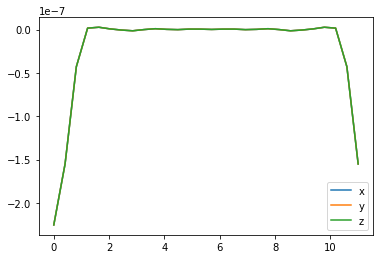

2.2527649475938352e-07


In [79]:
plt.plot(Xsym, np.real(chi0rrsym[0,0,0,:,0,0]), label='x')
plt.plot(Xsym, np.real(chi0rrsym[0,0,0,0,:,0]), label='y')
plt.plot(Xsym, np.real(chi0rrsym[0,0,0,0,0,:]), label='z')
plt.legend()
plt.show()
print(np.amax(np.abs(np.real(chi0rrsym))))

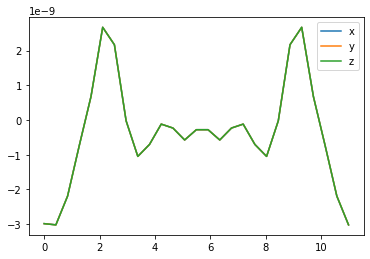

3.699812572801227e-07


In [80]:
plt.plot(X, np.real(chi0rr[0,0,0,:,0,0]), label='x')
plt.plot(X, np.real(chi0rr[0,0,0,0,:,0]), label='y')
plt.plot(X, np.real(chi0rr[0,0,0,0,0,:]), label='z')
plt.legend()
plt.show()
print(np.amax(np.abs(np.real(chi0rr))))

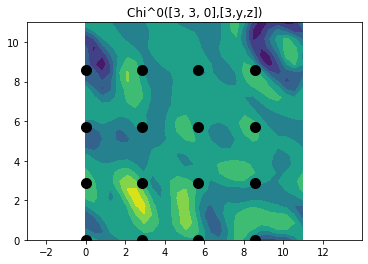

In [101]:
N = 27
cellnumber = 4
R = [3, 3, 0]
levelx = 3
X=np.linspace(0,xlim,27,endpoint=False)
plt.title(f'Chi^0({R},[{levelx},y,z])')

Rx, Ry, Rz = R
#X = np.linspace(0, cellnumber, N, endpoint=False)
plt.contourf(X, X, np.real(chi0rr[Rx, Ry, Rz, levelx, :, :]))

grid = np.meshgrid(range(4), range(4), indexing='ij')
plt.plot(xlim/4*grid[0], xlim/4*grid[1], 'ko', markersize=10)

plt.axis('equal')
plt.show()

In [ ]:
#q0=[0 0 0]
#q1=[0.25 0 0]
#q3=[-0.25 0 0]
#G0=[0 0 0]
#G1=[1 0 0]
#G2=[-1 0 0]
#G3=[0 1 0]
#G4=[0 -1 0]

i,j,k,l,m=0,1,2,3,4
m,n=1,3
G0=G[i]
G1=G[j]
G2=G[k]
G3=G[l]
G4=G[m]
q0=kpoints[0].frac_coords
q1=kpoints[m].frac_coords
q2=kpoints[n].frac_coords
chi00=sus_ncfile.reader.read_wggmat(kpoints[0]).wggmat
chi01=sus_ncfile.reader.read_wggmat(kpoints[m]).wggmat
chi02=sus_ncfile.reader.read_wggmat(kpoints[n]).wggmat
Summary=open("Summary",mode='w')
SummaryProperties=open("SummaryProperties",mode='w')


for o in range(nw):
    A,B,C,D=False,False,False,False
    E,F,Gb,H=False,False,False,False
    I,J,K,L=False,False,False,False 
    real=np.abs(np.real(chi01[o]))
    imag=np.abs(np.imag(chi01[o]))

    Summary.write("Evaluation of chi0(q,G1,G2) at omega ="+str(chi0.wpoints[o]))
    #q0,G0,Gx
    Summary.write("\nchi0("+str(q0)+','+str(G0)+','+str(G1)+')='+str(chi00[o,i,j]))
    #q0,Gx,G0 hermtician?
    Summary.write("\nchi0("+str(q0)+','+str(G1)+','+str(G0)+')='+str(chi00[o,j,i]))
    #-q0,-Gx,-G0 symmetric?
    Summary.write("\nchi0("+str(q0)+','+str(G2)+','+str(G0)+')='+str(chi00[o,k,i]))
    #-q0,-G0,-Gx real?
    Summary.write("\nchi0("+str(q0)+','+str(G0)+','+str(G2)+')='+str(chi00[o,i,k]))

    if chi00[o,i,j]==np.conj(chi00[o,j,i]):
        Summary.write('\nchi0(0,0,Gx;'+str(chi0.wpoints[o])+')=chi0(0,Gx,0;'+str(chi0.wpoints[o])+')')
        A=True
    if chi00[o,i,j]==chi00[o,k,i]:
        Summary.write('\nchi0(0,0,Gx;'+str(chi0.wpoints[o])+')=chi0(0,-Gx,0;'+str(chi0.wpoints[o])+')')
        E=True
    if chi00[o,i,j]==np.conj(chi00[o,i,k]):
        Summary.write('\nchi0(0,0,Gx;'+str(chi0.wpoints[o])+')=chi0*(0,0,-Gx;'+str(chi0.wpoints[o])+')')
        I=True
    
    
    
    #q0,Gx,Gy
    Summary.write("\nchi0("+str(q0)+','+str(G1)+','+str(G3)+')='+str(chi00[o,j,l]))
    #q0,Gx,G0 hermtician?
    Summary.write("\nchi0("+str(q0)+','+str(G3)+','+str(G1)+')='+str(chi00[o,l,j]))
    #-q0,-Gx,-G0 symmetric?
    Summary.write("\nchi0("+str(q0)+','+str(G4)+','+str(G2)+')='+str(chi00[o,m,k]))
    #-q0,-G0,-Gx real?
    Summary.write("\nchi0("+str(q0)+','+str(G2)+','+str(G4)+')='+str(chi00[o,k,m]))

    if chi00[o,j,l]==np.conj(chi00[o,l,j]):
        Summary.write('\nchi0(0,Gx,Gy;'+str(chi0.wpoints[o])+')=chi0(0,Gy,Gx;'+str(chi0.wpoints[o])+')')
        B=True
    if chi00[o,i,j]==chi00[o,m,k]:
        Summary.write('\nchi0(0,Gx,Gy;'+str(chi0.wpoints[o])+')=chi0(0,-Gy,-Gx;'+str(chi0.wpoints[o])+')')
        F=True
    if chi00[o,i,j]==np.conj(chi00[o,k,m]):
        Summary.write('\nchi0(0,Gx,Gy;'+str(chi0.wpoints[o])+')=chi0*(0,-Gx,-Gy;'+str(chi0.wpoints[o])+')')
        J=True
    

    #q1,G0,Gx
    Summary.write("\nchi0("+str(q1)+','+str(G0)+','+str(G1)+')='+str(chi01[o,i,j]))
    Summary.write("\nchi0("+str(q1)+','+str(G1)+','+str(G0)+')='+str(chi01[o,j,i]))
    Summary.write("\nchi0("+str(q2)+','+str(G2)+','+str(G0)+')='+str(chi02[o,k,i]))
    Summary.write("\nchi0("+str(q2)+','+str(G0)+','+str(G2)+')='+str(chi02[o,i,k]))


    if chi01[o,i,j]==np.conj(chi01[o,j,i]):
        Summary.write('\nchi0(qx,0,Gx;'+str(chi0.wpoints[o])+')=chi0(0,Gx,0;'+str(chi0.wpoints[o])+')')
        C=True
    if chi01[o,i,j]==chi02[o,k,i]:
        Summary.write('\nchi0(qx,0,Gx;'+str(chi0.wpoints[o])+')=chi0(0-qx,-Gx,0;'+str(chi0.wpoints[o])+')')
        Gb=True
    if chi01[o,i,j]==np.conj(chi02[o,i,k]):
        Summary.write('\nchi0(qx,0,Gx;'+str(chi0.wpoints[o])+')=chi0*(-qx,0,-Gx;',+str(chi0.wpoints[o])+')')
        K=True
    
    #q1,Gx,Gy
    Summary.write("\nchi0("+str(q1)+','+str(G1)+','+str(G3)+')='+str(chi01[o,j,l]))
    Summary.write("\nchi0("+str(q1)+','+str(G3)+','+str(G1)+')='+str(chi01[o,l,j]))
    Summary.write("\nchi0("+str(q2)+','+str(G4)+','+str(G2)+')='+str(chi02[o,m,k]))
    Summary.write("\nchi0("+str(q2)+','+str(G2)+','+str(G4)+')='+str(chi02[o,k,m]))

    if chi01[o,j,l]==np.conj(chi01[o,l,j]):
        Summary.write('\nchi0(qx,Gx,Gy;'+str(chi0.wpoints[o])+')=chi0(qx,Gy,Gx;'+str(chi0.wpoints[o])+')')
        D=True
    if chi01[o,i,j]==chi02[o,m,k]:
        Summary.write('\nchi0(qx,Gx,Gy;'+str(chi0.wpoints[o])+')=chi0(-qx,-Gy,-Gx;'+str(chi0.wpoints[o])+')')
        H=True
    if chi01[o,i,j]==np.conj(chi02[o,k,m]):
        Summary.write('\nchi0(qx,Gx,Gy;'+str(chi0.wpoints[o])+')=chi0*(-qx,-Gx,-Gy;'+str(chi0.wpoints[o])+')')
        L=True
    Summary.write("\nmax absolute value (real part and imaginary part for q="+str(q1)+str(np.amax(real))+' and'+str(np.amax(imag)))

    if A==True and B==True and C==True and D==True:
        SummaryProperties.write("\n\nThe FT of the function chi0(q,G,G;"+str(chi0.wpoints[o])+") is expected to be hermitian as the equality chi0(q,G1,G2)=chi0(q,G2,G1) is respected for all combinaisons of vectors")
    else:
        SummaryProperties.write("\n\nThe FT of the function chi0(q,G,G;"+str(chi0.wpoints[o])+") is not expected to be hermitian as the equality chi0(q,G1,G2)=chi0(q,G2,G1) is not respected for all combinaisons of vectors")
        if A==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(q,G2,G1) is not respected for the case where q=0 and G1=0 and G2=Gx")
        elif B==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(q,G2,G1) is not respected for the case where q=0 and G1=Gx and G2=Gy")
        elif C==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(q,G2,G1) is not respected for the case where q=qx and G1=0 and G2=Gx")
        elif B==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(q,G2,G1) is not respected for the case where q=qx and G1=Gx and G2=Gy")
    if E==True and F==True and Gb==True and D==True:
        SummaryProperties.write("\n\nThe FT of the function chi0(q,G,G;"+str(chi0.wpoints[o])+") is expected to be symmetric as the equality chi0(q,G1,G2)=chi0(-q,-G2,-G1) is respected for all combinaisons of vectors")
    else:
        SummaryProperties.write("\n\nThe FT of the function chi0(q,G,G;"+str(chi0.wpoints[o])+") is not expected to be symmetric as the equality chi0(q,G1,G2)=chi0(-q,-G2,-G1) is not respected for all combinaisons of vectors")
        if E==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(-q,-G2,-G1) is not respected for the case where q=0 and G1=0 and G2=Gx")
        elif F==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(-q,-G2,-G1) is not respected for the case where q=0 and G1=Gx and G2=Gy")
        elif Gb==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(-q,-G2,-G1) is not respected for the case where q=qx and G1=0 and G2=Gx")
        elif H==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0(-q,-G2,-G1) is not respected for the case where q=qx and G1=Gx and G2=Gy")
    if I==True and J==True and K==True and L==True:
        SummaryProperties.write("\n\nThe FT of the function chi0(q,G,G;"+str(chi0.wpoints[o])+") is expected to be real as the equality chi0(q,G1,G2)=chi0*(-q,-G1,-G2) is respected for all combinaisons of vectors")
    else:
        SummaryProperties.write("\n\nThe FT of the function chi0(q,G,G;"+str(chi0.wpoints[o])+") is not expected to be real as the equality chi0(q,G1,G2)=chi0*(-q,-G1,-G2) is not respected for all combinaisons of vectors")
        if I==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0*(-q,-G1,-G2) is not respected for the case where q=0 and G1=0 and G2=Gx")
        elif J==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0*(-q,-G1,-G2) is not respected for the case where q=0 and G1=Gx and G2=Gy")
        elif K==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0*(-q,-G1,-G2) is not respected for the case where q=qx and G1=0 and G2=Gx")
        elif L==False:
            SummaryProperties.write("\nThe equality chi0(q,G1,G2)=chi0*(-q,-G1,-G2) is not respected for the case where q=qx and G1=Gx and G2=Gy")
Summary.close()
SummaryProperties.close()